# Matplotlib Basics

### Pylab and what it is

John D. Hunter, a neurobiologist, began developing matplotlib around 2003, originally inspired to emulate commands from Mathworks’ MATLAB software. John passed away tragically young at age 44, in 2012, and matplotlib is now a full-fledged community effort, developed and maintained by a host of others.
John's talk on its evolution: https://www.youtube.com/watch?v=e3lTby5RI54

Knowing that matplotlib has its roots in MATLAB helps to explain why pylab exists. pylab is a module within the matplotlib library that was built to mimic MATLAB’s global style. It exists only to bring a number of functions and classes from both NumPy and matplotlib into the namespace, making for an easy transition for former MATLAB users who were not used to needing import statements.

The bottom line is that matplotlib has abandoned this convenience module and now explicitly recommends against using pylab.


We usually get away with just one import

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

## Two approaches of creating graphs

**1. Functional Approach: ** Using the basic Matplotlib command, we can easily create a plot. Let’s plot an example using two Numpy arrays x and y

In [3]:
import numpy as np
x = np.linspace(0,10,20)
print(x)
y = x**2

[ 0.          0.52631579  1.05263158  1.57894737  2.10526316  2.63157895
  3.15789474  3.68421053  4.21052632  4.73684211  5.26315789  5.78947368
  6.31578947  6.84210526  7.36842105  7.89473684  8.42105263  8.94736842
  9.47368421 10.        ]


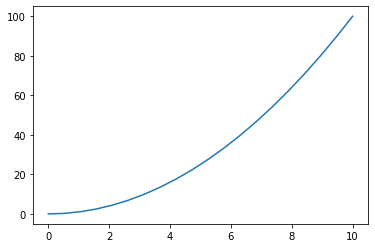

In [4]:
plt.plot(x,y)

To add labels and title:

Text(0, 0.5, 'Y label')

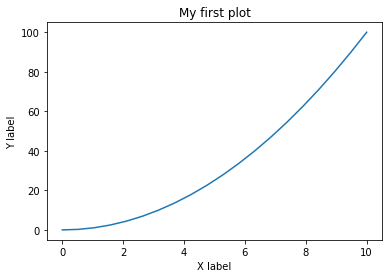

In [5]:
plt.plot(x,y)
plt.title('My first plot')
plt.xlabel('X label')
plt.ylabel('Y label')

**2. Object oriented approach: **Good way to create plots. The idea here is to create Figure objects and call methods off it. Let’s create a blank Figure using the .figure() method.

In [6]:
fig = plt.figure()

<Figure size 432x288 with 0 Axes>

Now we need to add a set of axes to it using the .add_axes() method. The add_axes() method takes in a list of four arguments (left, bottom, width, and height — which are the positions where the axes should be placed) ranging from 0 to 1.

<class 'matplotlib.axes._axes.Axes'>


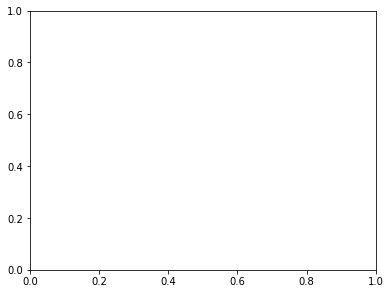

In [7]:
fig = plt.figure()
ax = fig.add_axes([0.1, 0.1, 0.8, 0.9])
print(type(ax))

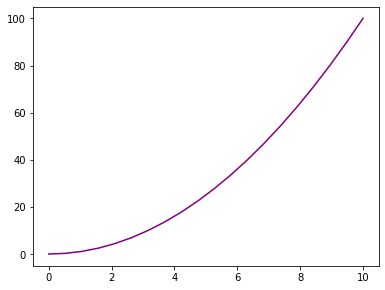

In [8]:
fig = plt.figure()
ax = fig.add_axes([0.1, 0.2, 0.8, 0.9])
ax.plot(x,y, 'purple')

We can further add x and y labels and a title to our plot same way we did in the Function approach, but there’s a slight difference here. 

In [9]:
y1 = x**2
y2 = x**3

Text(0.5, 1.0, 'First Plot')

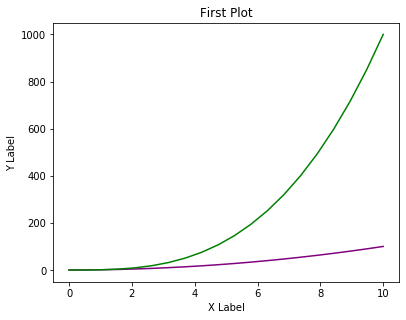

In [10]:
fig = plt.figure()
ax = fig.add_axes([0.1, 0.2, 0.8, 0.9])
ax.plot(x,y1, 'purple')
ax.plot(x,y2, 'green')
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_title('First Plot')

## Matplotlib object Hierarchy

A plot is really a hierarchy of nested Python objects. A “hierarchy” here means that there is a tree-like structure of matplotlib objects underlying each plot.

A Figure object is the outermost container for a matplotlib graphic, which can contain multiple Axes objects. One source of confusion is the name: an Axes actually translates into what we think of as an individual plot or graph
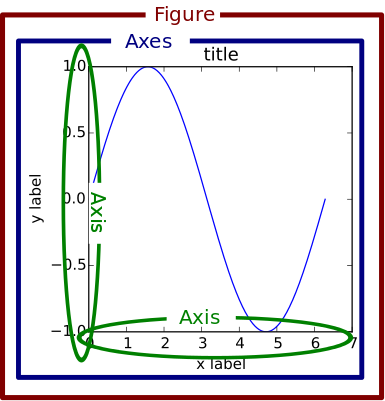

Here’s an illustration of this hierarchy in action.

matplotlib.figure.Figure

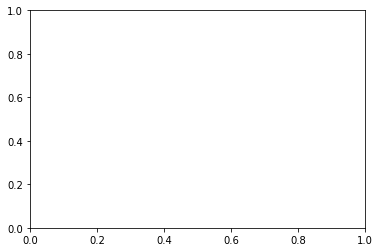

In [11]:
fig, _ = plt.subplots()
type(fig)

Above, we created two variables with plt.subplots(). The first is a top-level Figure object. The second is a “throwaway” variable that we don’t need just yet, denoted with an underscore. Using attribute notation, it is easy to traverse down the figure hierarchy and see the first tick of the y axis of the first Axes object:

In [12]:
one_tick = fig.axes[0].yaxis.get_major_ticks()[0]
type(one_tick)

matplotlib.axis.YTick

Above, fig (a Figure class instance) has multiple Axes (a list, for which we take the first element). Each Axes has a yaxis and xaxis, each of which have a collection of “major ticks,” and we grab the first one.

Matplotlib presents this as a figure anatomy, rather than an explicit hierarchy:
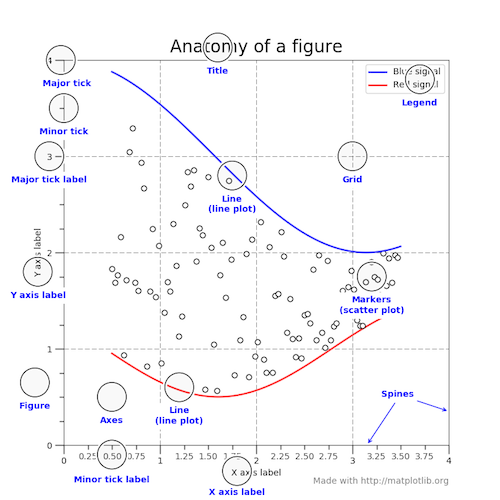

### Understanding plt.subplots() Notation

The prescribed way to create a Figure with a single Axes under the OO approach is (not too intuitively) with plt.subplots(). This is really the only time that the OO approach uses pyplot, to create a Figure and Axes:

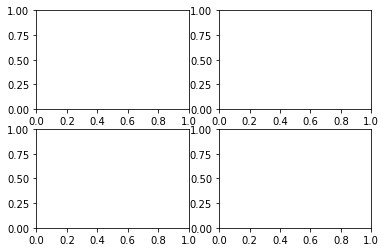

In [13]:
fig, ax = plt.subplots(nrows = 2, ncols = 2)

In [14]:
print(ax.shape)
print(ax)
ax[0][0]

(2, 2)
[[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000880ED68>


Above, we took advantage of iterable unpacking to assign a separate variable to each of the two results of plt.subplots(). Notice that we didn’t pass arguments to subplots() here. The default call is subplots(nrows=1, ncols=1). Consequently, ax is a single AxesSubplot object:

In [15]:
type(ax)

numpy.ndarray

We can call its instance methods to manipulate the plot similarly to how we call pyplots functions. Let’s illustrate with a stacked area graph of three time series

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49]
[[1 7 0 2 2 7 0 6 1 3 4 7 9 8 9 1 2 3 6 9 1 9 1 0 3 2 2 3 3 9 3 6 2 2 9 6
  8 8 4 0 0 4 6 6 0 0 1 1 8 2]
 [9 4 1 5 5 5 6 5 8 8 5 4 9 9 4 8 1 9 1 2 4 0 2 3 4 5 1 9 0 7 5 0 9 3 1 4
  7 2 4 6 8 3 0 4 1 6 8 6 7 0]
 [6 4 0 3 3 4 4 4 7 3 2 6 2 4 5 1 4 5 7 2 4 4 9 2 0 6 4 7 3 6 9 5 6 9 4 0
  3 9 2 3 4 8 1 6 7 9 2 4 0 0]]


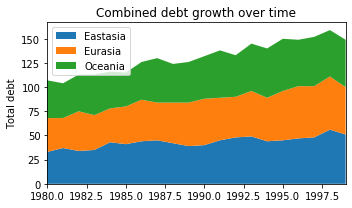

In [16]:
#creating 3 time series variables
rng = np.arange(50)
print(rng)
rnd = np.random.randint(0, 10, size=(3, rng.size))
print(rnd)

yrs = 1950 + rng

fig, ax = plt.subplots(figsize=(5, 3))
ax.stackplot(yrs, rng + rnd, labels=['Eastasia', 'Eurasia', 'Oceania'])
ax.set_title('Combined debt growth over time')
ax.legend(loc='upper left')
ax.set_ylabel('Total debt')
ax.set_xlim(xmin=yrs[0], xmax=yrs[-1])
fig.tight_layout()

**What we have done**:
1. After creating three random time series, we defined one Figure (fig) containing one Axes (a plot, ax).
2. We call methods of ax directly to create a stacked area chart and to add a legend, title, and y-axis label. Under the object-oriented approach, it’s clear that all of these are attributes of ax.
3. tight_layout() applies to the Figure object as a whole to clean up whitespace padding

Let’s look at an example with multiple subplots (Axes) within one Figure, plotting two correlated arrays that are drawn from the discrete uniform distribution:

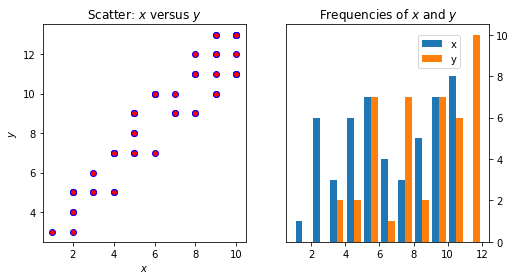

In [17]:
x = np.random.randint(low=1, high=11, size=50)
y = x + np.random.randint(1, 5, size=x.size)
data = np.column_stack((x, y))
#print(data)

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2,
                               figsize=(8, 4))

ax1.scatter(x=x, y=y, marker='o', c='r', edgecolor='b')
ax1.set_title('Scatter: $x$ versus $y$')
ax1.set_xlabel('$x$')
ax1.set_ylabel('$y$')

ax2.hist(data, bins=np.arange(data.min(), data.max()),
         label=('x', 'y'))
ax2.legend(loc=(0.65, 0.8))
ax2.set_title('Frequencies of $x$ and $y$')
ax2.yaxis.tick_right()

Point to remember: Multiple Axes can be enclosed in or “belong to” a given figure. In the case above, fig.axes gets us a list of all the Axes objects:

In [18]:
(fig.axes[0] is ax1, fig.axes[1] is ax2)

(True, True)

Creating a figure that holds a 2x2 grid of Axes objects.

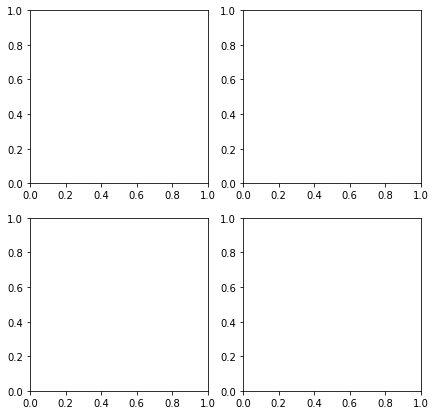

In [19]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(7, 7))

Now, what is ax? It’s no longer a single Axes, but a two-dimensional NumPy array of them:

In [20]:
print(type(ax))
print(ax)

<class 'numpy.ndarray'>
[[<matplotlib.axes._subplots.AxesSubplot object at 0x0000000008AFBF60>


We now need to call plotting methods on each of these Axes (but not the NumPy array, which is just a container in this case). A common way to address this is to use iterable unpacking after flattening the array to be one-dimensional:

In [21]:
a = np.array([[[1],
              [2]]])

In [22]:
a.shape

(1, 2, 1)

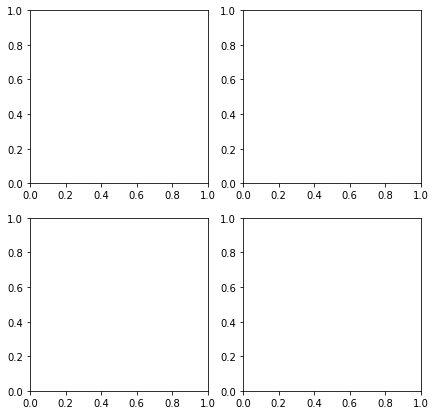

In [23]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(7, 7))
ax1, ax2, ax3, ax4 = ax.flatten()  # flatten a 2d NumPy array to 1d

We could’ve also done this with ((ax1, ax2), (ax3, ax4)) = ax, but the first approach tends to be more flexible.

In [24]:
#Next let’s define a “helper function” that places a text box inside of a plot and acts as an “in-plot title”:
def add_titlebox(ax, text):
    ax.text(.55, .8, text, horizontalalignment='center', transform=ax.transAxes, 
            bbox=dict(facecolor='white', alpha=0.6), fontsize=12.5)
    return ax

We’re ready to do some plotting. Matplotlib’s gridspec module allows for more subplot customization. pyplot’s subplot2grid() interacts with this module nicely. Let’s say we want to create a layout like this:
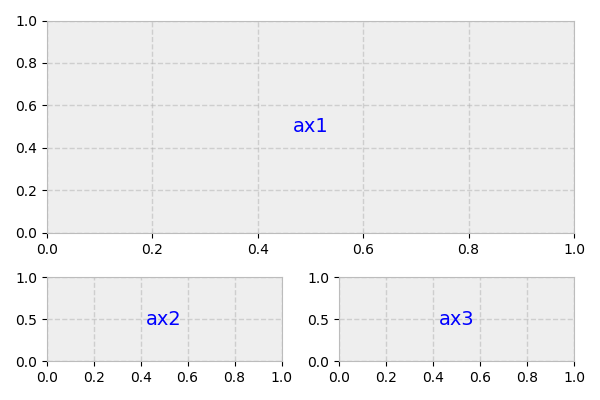

Above, what we actually have is a 3x2 grid. ax1 is twice the height and width of ax2/ax3, meaning that it takes up two columns and two rows.
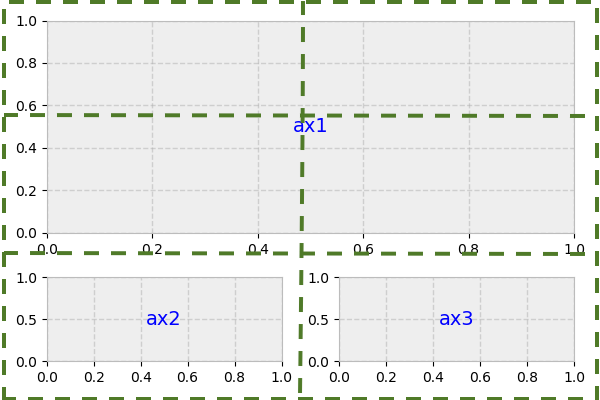

The second argument to subplot2grid() is the (row, column) location of the Axes within the grid:

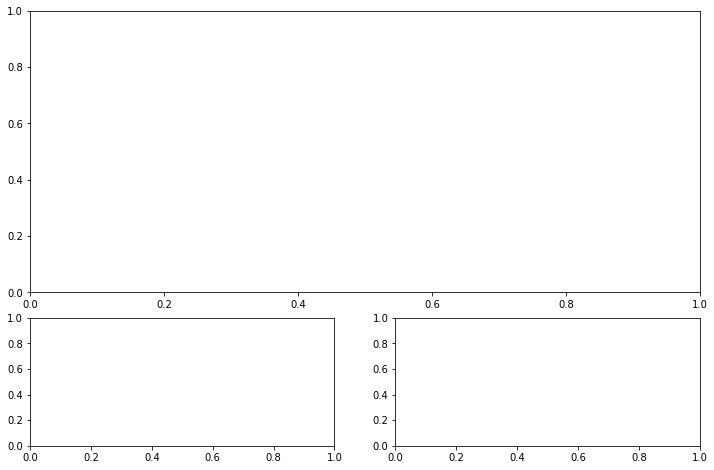

In [25]:
gridsize = (3, 2)
fig = plt.figure(figsize=(12, 8))
ax1 = plt.subplot2grid(gridsize, (0, 0), colspan=2, rowspan=2)
ax2 = plt.subplot2grid(gridsize, (2, 0))
ax3 = plt.subplot2grid(gridsize, (2, 1))

Now, we can proceed as normal, modifying each Axes individually.